## Introduction 

We'll work with a data set about the urban traffic in São Paulo, the most populous city in Brazil. When it comes to traffic congestion, São Paulo is one of the most congested cities in the world.

Traffic jams can be as long as 100 km, and it can take people more than two hours to get to work. The city even has an air-taxi service for those who can afford it.

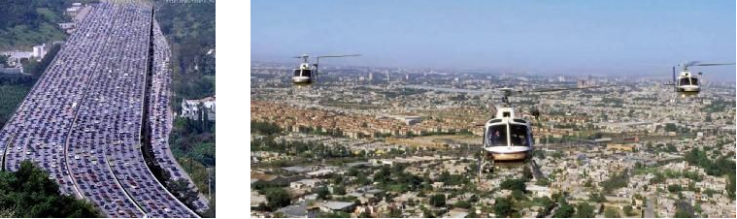

Traffic jams cause significant loss. Instead of working, people are stuck in traffic wasting fuel, which leads to more air pollution, ultimately impacting human health. According to the [World Bank](https://www.worldbank.org/en/news/feature/2014/05/01/changing-commuter-choices-helps-sao-paulo-reduce-traffic-congestion), São Paulo's traffic jams were estimated to cost $17.8 billion dollars in 2012.

Now, let's introduce our dataset.

Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009 — from Monday to Friday.

Each row describes the following:

* The time of registering the data: the Hour (Coded) column.
* The number of incidents that happened in São Paulo at the time of registering the data: Immobilized bus, Broken Truck, Vehicle excess, Fire vehicles, etc.
* The traffic slowness at the time of registering the data: Slowness in traffic (%).

The data was registered from 7:00 to 20:00 every 30 minutes. The Hour (Coded) column has values from 1 to 27:
* 1 corresponds to 7:00.
* 2 corresponds to 7:30.
* 3 corresponds to 8:00.
* ...
* 26 corresponds to 19:30.
* 27 corresponds to 20:00.

The data can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil)

In [23]:
# The data points are separated by ;, so we'll need to use sep=';' to read in the file properly.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';' )

print(traffic.head())
print('\n')
print(traffic.tail())
print('\n')

traffic.info()

   Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
0             1                0             0               0   
1             2                0             0               0   
2             3                0             0               0   
3             4                0             0               0   
4             5                0             0               0   

   Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
0                0             0              0                             0   
1                0             0              0                             0   
2                0             0              0                             0   
3                0             0              0                             0   
4                0             0              0                             0   

   Incident involving dangerous freight  Lack of electricity  Fire  \
0                                     0       

Our goal here is to determine the factors that cause the traffic slowness in São Paulo to worsen.

We're not asking what's causing the traffic congestion. The answer to this is that there are just too many cars on the road. We're asking what factors worsen the situation.

Let's begin by exploring the Slowness in traffic (%) column.

In [24]:
# The data type of this column is object, so we converted it to a float

traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

# Let's use the DataFrame.describe() method to see some of its characteristics:

traffic['Slowness in traffic (%)'].describe()

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64

We obeserve that the traffic slowness ranges from 3.4% to 23.4%, with an average of 10.1%
To get a better sense of the distribution of the values, we can plot a histogram.

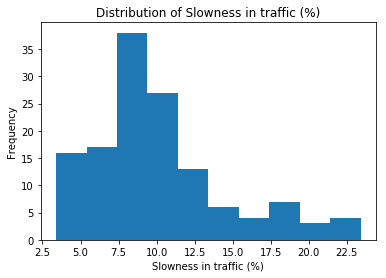

In [28]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.xlabel('Slowness in traffic (%)')
plt.title('Distribution of Slowness in traffic (%)')
plt.show()

We observe the following :

* The distribution of Slowness in traffic (%) is right skewed,
* Most of the values pile up on the left side of the histogram,
* Most of the values are below 15.0%.

So far, we've examined the distribution of the Slowness in traffic (%) column. Recall that our goal here is to determine the factors that worsen the traffic slowness in São Paulo.

With the exception of the Hour (Coded) and Slowness in traffic (%) columns, all the columns describe incident types related to traffic slowness: immobilized buses, broken trucks, accidents with victims, fire, manifestations, etc.

Each one of these columns records the number of incidents reported at the time of registering the data. If we sum all the values in a column, we can get the total number of incidents that happened between December 14, 2009 and December 18, 2009 — from Monday to Friday.

For instance, we see there were 118 broken truck incidents

In [29]:
print(traffic['Broken Truck'].sum())

118


Now, let's calculate the sums for all the incident columns so we can compare them (we start with isolating the incident columns by dropping the columns 'Hour (Coded)' and 'Slowness in traffic (%)').

In [30]:
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)
print(incidents.sum())

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64


We can use a bar plot to visualize the values

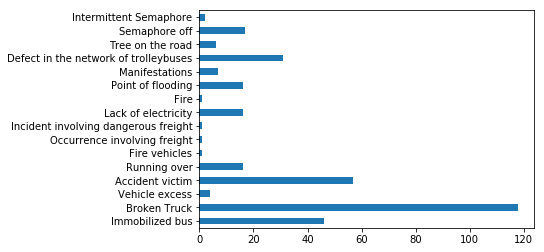

In [33]:
# Since dataframe.sum() returns a pandas Series,  we can use the Series.plot.bar()
# W use barh() instead of bar() to generate a horizontal graph, so that the x axis can be easily readeable 

incidents.sum().plot.barh()
plt.show()

We observe the following :
* The lack of electricity and flooding are less frequent than broken trucks.
* The most frequent incident type is broken trucks.

Recall that we're interested in identifying factors that worsen the traffic slowness.

To get an accurate picture about each incident type and its relationship with traffic slowness, we can look up a few correlation values. 

The table below shows the correlation between Slowness in traffic (%) and every other column:

In [35]:
print(traffic.corr()['Slowness in traffic (%)'])

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64


Leaving out the Hour (Coded) column (which doesn't describe an incident type), Slowness in traffic (%) correlates most strongly with the following:

* Lack of electricity: +0.44
* Point of flooding: +0.42
* Semaphore off: +0.34

Now, let's use a scatter plot in order to visualize the correlation between any two columns. Let's start with generating a scatter plot for Slowness in traffic (%) and Lack of electricity.

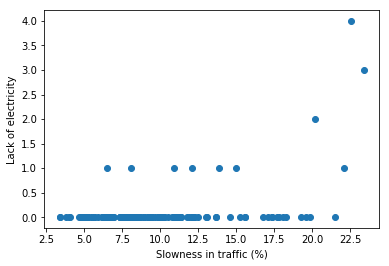

In [42]:
plt.scatter(traffic['Slowness in traffic (%)'],traffic['Lack of electricity'])
plt.xlabel('Slowness in traffic (%)')
plt.ylabel('Lack of electricity')
plt.show()

The positive correlation is not very obvious on the scatter plot — although we see that when Lack of electricity increases to 2, 3 or 4, the traffic slowness percentage tends to increase as well.

Now, let's now generate the other two scatter plots.

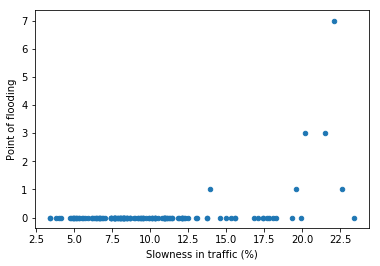

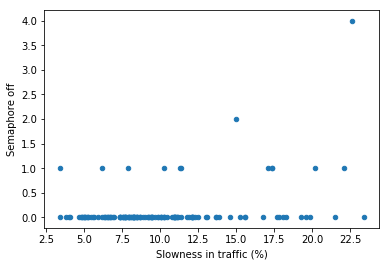

In [43]:
traffic.plot.scatter(x='Slowness in traffic (%)', y='Point of flooding')
plt.show()

traffic.plot.scatter(x='Slowness in traffic (%)', y='Semaphore off')
plt.show()

Previously, we looked up a few correlation values and generated three scatter plots. We identified lack of electricity, flooding, and nonfunctional semaphores as potential factors worsening the traffic.

To look for more evidence, we're going to isolate all the rows where traffic slowness is 20% or more. Then, we're going to calculate and visualize the incident frequency.

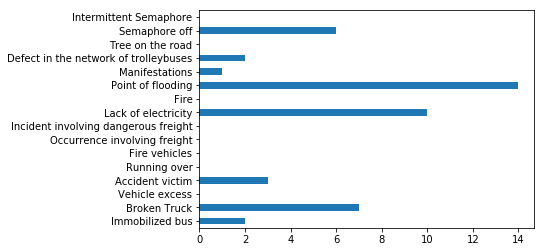

In [55]:
slowness_20_or_more= traffic[traffic['Slowness in traffic (%)']>= 20]

# We drop the Slowness in traffic (%) and Hour (Coded) columns from slowness_20_or_more.

slowness_20_or_more = slowness_20_or_more.drop(['Slowness in traffic (%)','Hour (Coded)'], axis = 1)

# We calculate the event frequencies using the DataFrame.sum() method on slowness_20_or_more.

incident_frequencies = slowness_20_or_more.sum()

# We use incident_frequencies to plot a horizontal bar plot

incident_frequencies.plot.barh()
plt.show()

One conclusion is that lack of electricity and flooding are probably two factors that are causing significant traffic problems. Nonfunctional semaphores also affect traffic, but they are probably a result of lack of electricity.

If we had to communicate our results to São Paulo's administration, we could report that lack of electricity and flooding cause significant traffic problems. This information can help in choosing which incident type to prioritize solving.

The last thing we're going to look at in this project is how traffic slowness changes over the 7:00 – 20:00 time interval. First, we're going to isolate the data for each day from Monday to Friday.

In [56]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic
    
# We use the zip() function above to iterate over range() and days at the same time.
# The traffic_per_day variable is a Python dictionary. It contains five keys: 'Monday', 'Tuesday', 'Wednesday', 'Thursday', and 'Friday'. 
# For each key, we have a DataFrame containing only the data for that specific day.
# For instance, traffic_per_day['Monday'] has only the data for Monday:

In [58]:
traffic_per_day['Monday'].head(3)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7


Now, let's use  a line plot to visualize how the values Slowness in traffic (%) change over time on Monday.

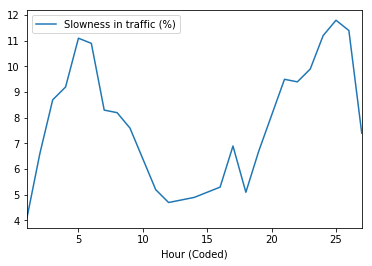

In [59]:
traffic_per_day['Monday'].plot.line(x='Hour (Coded)', y='Slowness in traffic (%)')
plt.show()

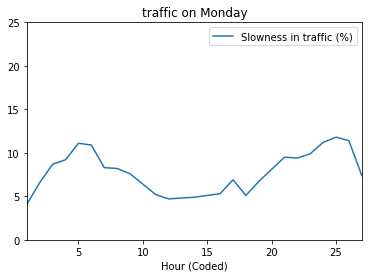

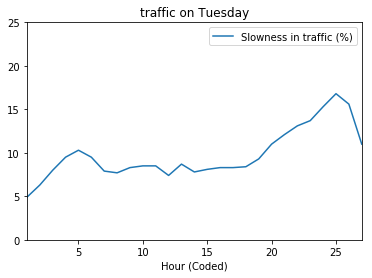

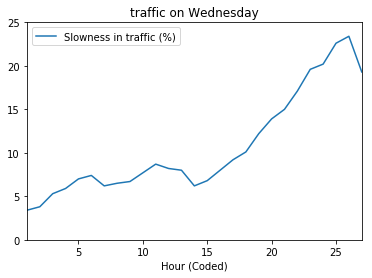

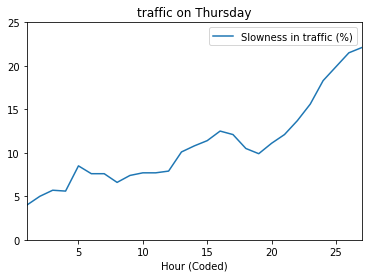

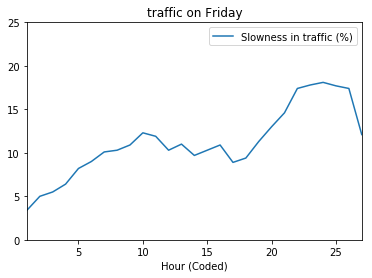

In [60]:
for day in days :
    traffic_per_day[day].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
    plt.title('traffic on'+ ' '+ day)
    plt.ylim([0, 25])
    plt.show()

# we used plt.ylim([0, 25]) to make the range of the y-axis the same for all plots; this helps with comparison.

Let's better display all these five line plots on the same graph, to help comparaison. 

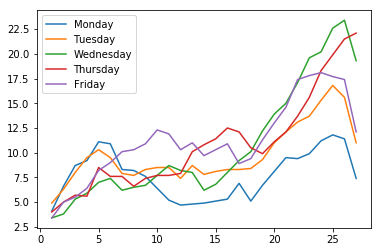

In [61]:
for day in days :
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'], label = day)

plt.legend()
plt.show()

Looking at the graph, we see the slowest traffic was on Wednesday and Thursday nights between 17:00 and 20:00. This specific time interval also registered high slowness values on Tuesday and Friday (and Monday — more or less). This is most likely the time when people are returning home from work.

Now, let's use the Grid Charts to display all these plot into one figure to better compare and understand them.

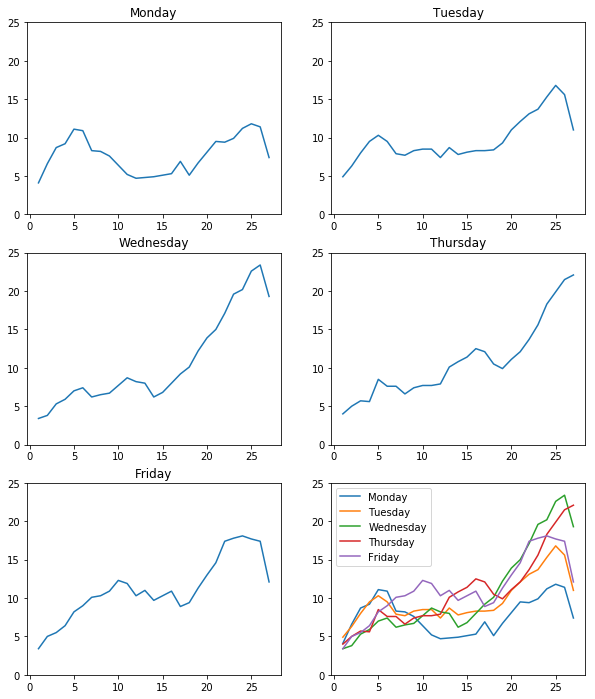

In [68]:
plt.figure(figsize=(10,12))
for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'], label = day)
    plt.title(day)
    plt.ylim([0, 25])
    
plt.subplot(3, 2, 6)
for day in days :
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'], label = day)
    plt.ylim([0,25])
    
plt.legend()   
plt.show()
    